# Tinder Reviews Sentiment Analysis using Python

Tinder is one of the most popular dating applications. It connects people having similar interests. To check whether Tinder helps people find partners, we can analyze the sentiments of people about Tinder. There are a lot of reviews on the Google Play Store about Tinder. We can use that data to analyze the sentiments of Tinder users.

The dataset I am using for the task of Tinder reviews sentiment analysis is downloaded from Kaggle. It was collected from Tinder reviews on the Google Play store.

In [1]:
# importing the necessary Python libraries and the dataset

import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv("datum/tinder_google_play_reviews.csv")
print(data.head())

                               reviewId         userName  \
0  e6d3a576-c0b5-456d-a161-a03a21635390     Kranan Vlogs   
1  acb008f0-be43-4363-83c4-35581ed81c22    Aayush Gautam   
2  2bd80134-54b6-4363-9c70-2fa8023b49e3  Stinkin Dinkins   
3  f52d8a14-e901-472e-8fe6-40f2c7f4b931      king catnip   
4  e62d8632-a665-4f39-bbcf-fa4c7bc36402   Nicholas Scull   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/AD5-W...   
1  https://play-lh.googleusercontent.com/a-/AD5-W...   
2  https://play-lh.googleusercontent.com/a-/AD5-W...   
3  https://play-lh.googleusercontent.com/a-/AD5-W...   
4  https://play-lh.googleusercontent.com/a-/AD5-W...   

                                             content  score  thumbsUpCount  \
0                                              soon.      5              0   
1  A fraud app. Even if you go with gold or premi...      1              0   
2  honestly I'm a thicker guy. so I know I wouldn...      1         

In [2]:
# create a new dataset with the content column and move further

data = data[["content"]]


#let's see if we have null values in the content column:

data.isnull().sum()


#remove the null values and move on

data = data.dropna()

In [4]:
# clean the text in the content column

import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context 
    #in case of getting an SSL/Certificate error, run the following command.This works by disabling SSL check!

nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gengxingri/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


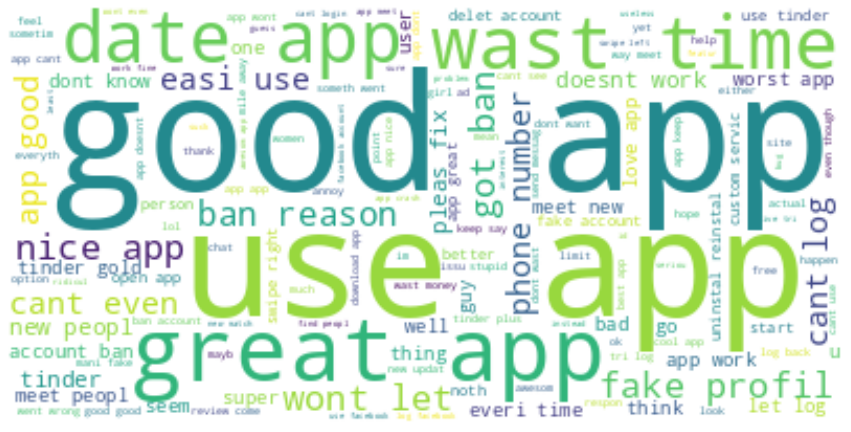

In [5]:
# look at the kind of words people use in the reviews of Tinder

text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
# add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the reviews

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gengxingri/nltk_data...


                                             content  Positive  Negative  \
0                                               soon     0.000     0.000   
1  fraud app even go gold premium pass match u ms...     0.000     0.273   
2  honest im thicker guy know wouldnt get much at...     0.344     0.156   
3  ive swipe left peopl seem match women sea  hav...     0.139     0.000   
4  got ban genderfluid put pic feminin masculin c...     0.097     0.213   

   Neutral  
0    1.000  
1    0.727  
2    0.500  
3    0.861  
4    0.690  


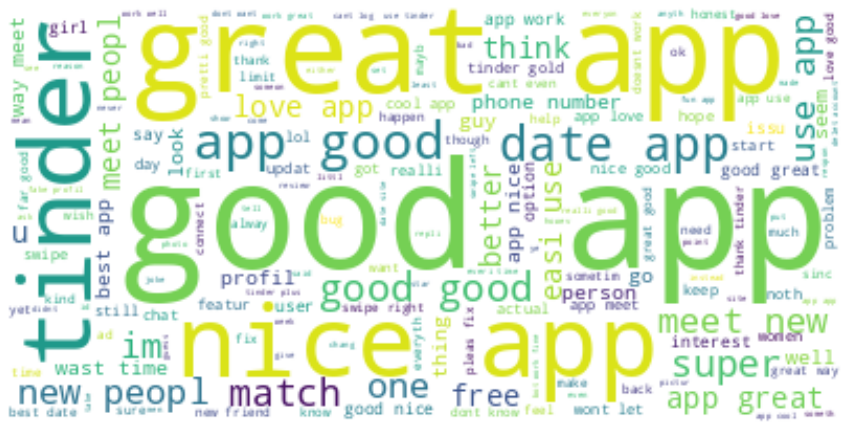

In [7]:
# look at the kind of words people use in the positive reviews of Tinde

positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

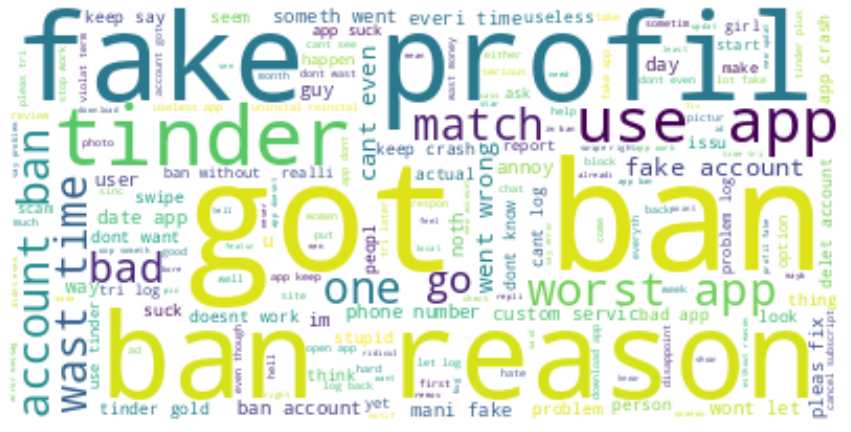

In [8]:
# look at the kind of words people use in the negative reviews of Tinder

negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
#  look at the overall sentiment score of the users of Tinder

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [10]:
# look at the total of all the sentiment scores
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  164456.02900002658
Negative:  64277.90599999899
Neutral:  331407.0049999619
